# COMP3850 Group 39 project presentation
### FinData Ltd
<img src="findatalogo.png">

## Agenda
1. Introduction
2. Project description
3. Project Demonstration
    * Data Extraction
    * Data Preparation
    * Visualisations
    * Determining stationarity
    * ARIMA model
    * Supervised learning models
    * Model evaluation
4. Overall findings
5. Outstanding/future work

## 1. Introduction
FinData is made up of six skilled data scientists:
1. Christian Stornelli
2. Arnesh Chakrabarti
3. Linda Le
4. John Bekiaris
5. Sasha Nair
6. Bishal Chowdhury

### About our Sponsor, Kensho Data
* Kensho Data is a company focused on R&D in financial data. They specialize in building high frequency trading strategies.

## 2. Project Description:
* Findata tasked us to analyse and find a correlation between Foregin Exchange (FX) currency pairs
### What is FX?


##

In [26]:
#data manipulation libraries
import pandas as pd
import numpy as np
from numpy import histogram 

#data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import boxplot, scatter
# import matplotlib as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import pyplot

#stat models libraries 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller #for augmented Dickey-Fuller test
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt #autocovariance plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

#sklearn predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#technical analysis libaries
import talib as ta # Used to perform Technical analysis of financial market data
import pmdarima as pm

#libaries to collect path for data extraction
import os
import glob

#others libraries 
import math
from datetime import datetime

## 3. Project Demonstration
### Quick method: Data Extraction/ Preparation

In [3]:
directory = os.getcwd()
filepath = f"{directory}\Hourly_data"
dfeurgbp_hr = pd.read_csv(f"{filepath}\dfeurgbp_hr.csv")
dfeurgbp_hr = dfeurgbp_hr.drop(dfeurgbp_hr.columns[[0]], axis=1)
dfeurgbp_hr[['Date', 'Time']] = dfeurgbp_hr['datetime'].str.split(' ', expand=True)
dfeurgbp_hr[['Time', 'Useless']]  = dfeurgbp_hr['Time'].str.split('+', expand=True)
dfeurgbp_hr.head()

,datetime,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,0.90035,0.90037,0.90033,0.90036,-1,-1.0,-1,0.90044,0.90044,0.90040,0.90042,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 01:00:00+00:00,0.89869,0.89869,0.89862,0.89862,-1,-1.0,-1,0.89873,0.89873,0.89867,0.89867,-1,-1.0,-1,2020-06-01,01:00:00,00:00
2,2020-06-01 02:00:00+00:00,0.89715,0.89719,0.89715,0.89718,-1,-1.0,-1,0.89718,0.89722,0.89718,0.89722,-1,-1.0,-1,2020-06-01,02:00:00,00:00
3,2020-06-01 03:00:00+00:00,0.89786,0.89786,0.89785,0.89785,-1,-1.0,-1,0.89791,0.89792,0.89788,0.89790,-1,-1.0,-1,2020-06-01,03:00:00,00:00
4,2020-06-01 04:00:00+00:00,0.89880,0.89885,0.89878,0.89881,-1,-1.0,-1,0.89884,0.89886,0.89882,0.89883,-1,-1.0,-1,2020-06-01,04:00:00,00:00


### Data Extraction

In [ ]:
def data_extraction(curr):
    directory = os.getcwd()
    filepath = f"{directory}\FX"
    file_list = []
    for file in os.listdir(filepath):
        d = os.path.join(filepath, file)
        if os.path.isdir(d):
            file_list.append(d)
    dfs = []
    for d in file_list:
        csv_files = glob.glob(os.path.join(d, "*.csv"))
        for f in csv_files:
            if f"bar_Forex_{curr}" in f:
                df = pd.read_csv(f)
                dfs.append(df)
    final_df = pd.concat(dfs)
    return final_df

In [ ]:
dfeurgbp = data_extraction('EURGBP')
dfeurgbp.head()

### Data Preparation

In [ ]:
# dfeurgbp_hr[['Date', 'Time']] = dfeurgbp_hr['datetime'].str.split(' ', expand=True)
# dfeurgbp_hr[['Time', 'Useless']]  = dfeurgbp_hr['Time'].str.split('+', expand=True)

In [55]:
#Determining the size of each dataframe (number of records, number of columns)
dfeurgbp_hr.shape

(2486, 18)

In [56]:
dfeurgbp_hr.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,2486.000,2486.000,2486.000,2486.000,2486.0,2486.0,2486.0,2486.000,2486.000,2486.000,2486.000,2486.0,2486.0,2486.0
mean,0.904,0.904,0.904,0.904,-1.0,-1.0,-1.0,0.904,0.904,0.904,0.904,-1.0,-1.0,-1.0
std,0.008,0.008,0.008,0.008,0.0,0.0,0.0,0.008,0.008,0.008,0.008,0.0,0.0,0.0
min,0.887,0.887,0.887,0.887,-1.0,-1.0,-1.0,0.887,0.887,0.887,0.887,-1.0,-1.0,-1.0
25%,0.899,0.899,0.899,0.899,-1.0,-1.0,-1.0,0.899,0.899,0.899,0.899,-1.0,-1.0,-1.0
50%,0.904,0.904,0.904,0.904,-1.0,-1.0,-1.0,0.904,0.904,0.904,0.904,-1.0,-1.0,-1.0
75%,0.909,0.909,0.909,0.909,-1.0,-1.0,-1.0,0.909,0.909,0.909,0.909,-1.0,-1.0,-1.0
max,0.928,0.928,0.928,0.928,-1.0,-1.0,-1.0,0.928,0.928,0.928,0.928,-1.0,-1.0,-1.0


In [57]:
print(f'Are there any null values in EUROGBP? {dfeurgbp_hr.isnull().values.any()}')

Are there any null values in EUROGBP? False


In [58]:
dfeurgbp_hr.dtypes

datetime         object
bid_open        float64
bid_high        float64
bid_low         float64
bid_close       float64
bid_volume        int64
bid_average     float64
bid_barCount      int64
ask_open        float64
ask_high        float64
ask_low         float64
ask_close       float64
ask_volume        int64
ask_average     float64
ask_barCount      int64
Date             object
Time             object
Useless          object
dtype: object

### Visualisation

#### Line Graph

Text(0.5, 1.0, 'EUR/GBP')

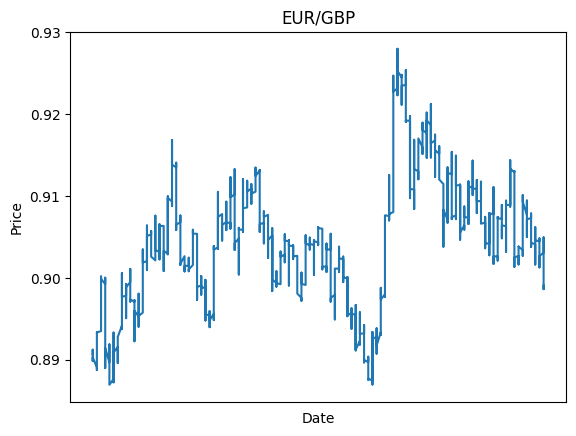

In [30]:
plot1 = plt.subplot2grid((1, 1), (0, 0))
plot1.plot(dfeurgbp_hr['Date'], dfeurgbp_hr['bid_close'])
plot1.set_xticks([])
plot1.set_xlabel('Date')
plot1.set_ylabel('Price')
plot1.set_title('EUR/GBP')

#### Boxplot

<AxesSubplot: title={'center': 'EUR/GBP'}>

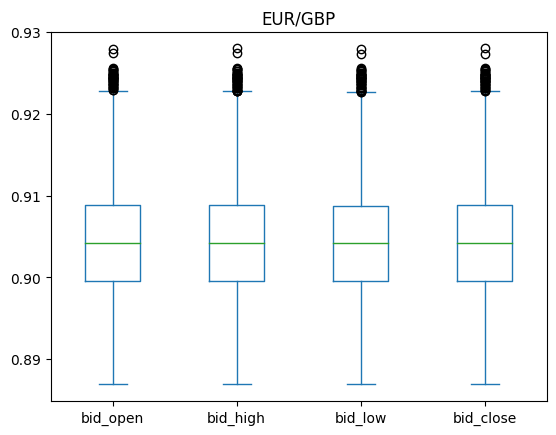

In [32]:
dfeurgbp_hr[['bid_open','bid_high','bid_low','bid_close']].plot(kind='box', title = 'EUR/GBP')

#### Candle Stick Chart

In [102]:
fig = go.Figure(data=[go.Candlestick(x=dfeurgbp_hr['Date'],
                open=dfeurgbp_hr['bid_open'],
                high=dfeurgbp_hr['bid_high'],
                low=dfeurgbp_hr['bid_low'],
                close=dfeurgbp_hr['bid_close'])], layout= go.Layout(title = go.layout.Title(text="Euro/British Pound Candlestick")))

fig.show()

#### Bollinger Bands

In [90]:
##Bollinger Bands EUR-GBP
dfeurgbp_hr['TP'] = (dfeurgbp_hr['bid_close'] + dfeurgbp_hr['bid_low'] + dfeurgbp_hr['bid_high'])/3
dfeurgbp_hr['std'] = dfeurgbp_hr['TP'].rolling(20).std(ddof=0)
dfeurgbp_hr['MA-TP'] = dfeurgbp_hr['TP'].rolling(20).mean()
dfeurgbp_hr['BOLU'] = dfeurgbp_hr['MA-TP'] + 2*dfeurgbp_hr['std']
dfeurgbp_hr['BOLD'] = dfeurgbp_hr['MA-TP'] - 2*dfeurgbp_hr['std']
dfeurgbp_hr = dfeurgbp_hr.dropna()
#print(dfeurgbp_hr.head())

C:\Users\Chris\AppData\Local\Temp\ipykernel_21248\3972921087.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chris\AppData\Local\Temp\ipykernel_21248\3972921087.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chris\AppData\Local\Temp\ipykernel_21248\3972921087.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

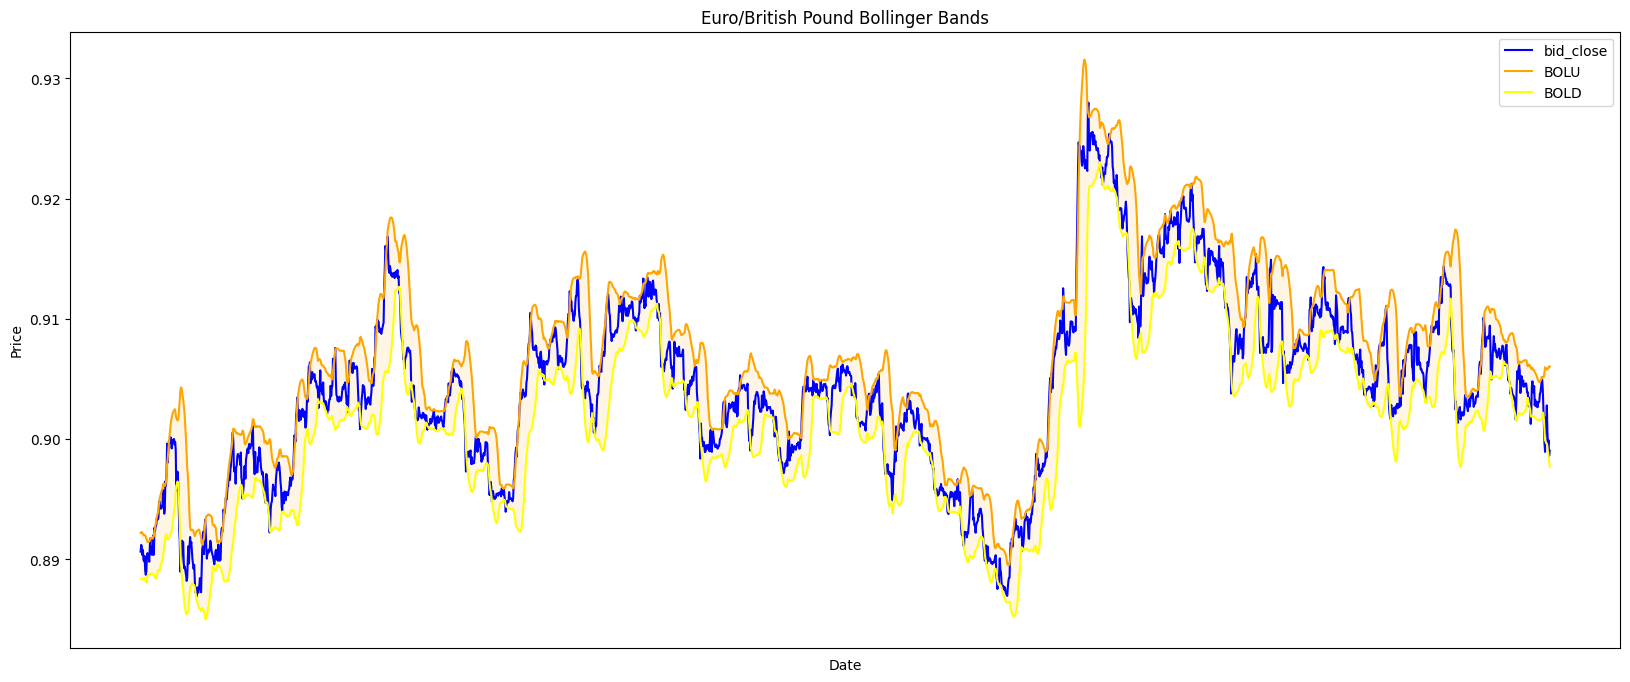

In [92]:
# Plotting it all together
ax = dfeurgbp_hr[['bid_close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'], figsize=(20, 8))
ax.fill_between(dfeurgbp_hr.index, dfeurgbp_hr['BOLD'], dfeurgbp_hr['BOLU'], facecolor='orange', alpha=0.1)
ax.set_title('Euro/British Pound Bollinger Bands')
ax.set_xticks([])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

### Determining stationarity
#### Autocovariance and Autocorrelation plots 

In [24]:
# Plotting Autocovariance
autocovariance_eurgbp = smt.stattools.acovf(dfeurgbp_hr['bid_close'], fft=True)

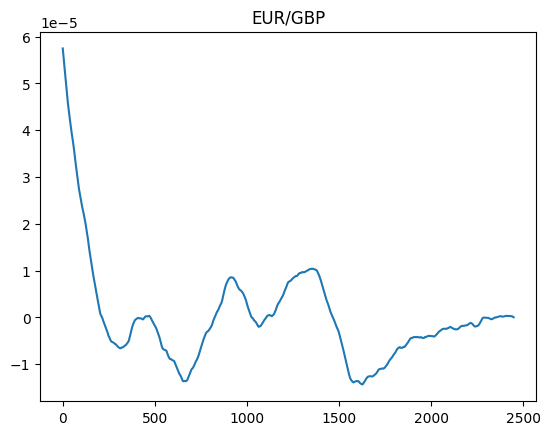

In [31]:
# Plot for EUR/GBP
plt.plot(list(range(0,len(autocovariance_eurgbp))),autocovariance_eurgbp)
plt.title('Autocovariance plot for EUR/GBP')
plt.show()

Autocovariance is a function that allows for identification of the covariance of the process in between time points. It can be expressed through correlation coefficients between –1 and +1 (y-axis).

Autocovariance plots for the different currency pairs are shown above. These plots are harder to interpret, hence we will instead graph autocorrelation plots to determine stationarity of the time series. 

In [33]:
def autocorrelation_plots(curr_df, name):
    fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2) # create two subplots, one in each row
    smt.graphics.plot_acf(curr_df['bid_close'],lags=10,alpha=0.05, title="Autocorrelation with lags 10", ax=ax)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=50,alpha=0.05, title="Autocorrelation with lags 50",ax=ax2)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=100,alpha=0.05, title="Autocorrelation with lags 100",ax=ax3)
    smt.graphics.plot_acf(curr_df['bid_close'],lags=200,alpha=0.05, title="Autocorrelation with lags 200",ax=ax4)
    fig.suptitle('Autocorrelation ' + str(name))
    fig.tight_layout()
    plt.show()

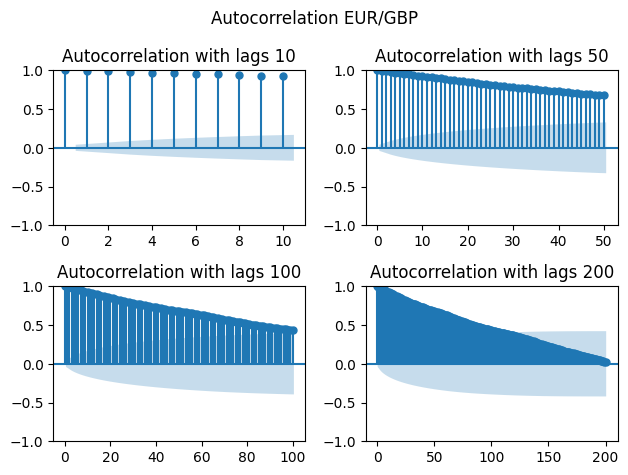

In [34]:
autocorrelation_plots(dfeurgbp_hr, 'EUR/GBP')

We can observe that curreny pair EUR/GBP is stationary with lags over 125. 

For a stationary series, we want to see that the autocorrelation plots show exponential decay, which can be observed above.


#### Augmented Dickey Fuller test
Used to determine stationarity

In [35]:
#function that produces a hypothesis test with a conclusion of stationary or not
def adfuller_test(data, field):
    print(f'Hypothesis test on field :{field}')
    print(f'H0: {field} is not stationary, H1: {field} is stationary')
    ADF_stat, p_val, lags, obs, crit, t = adfuller(data[field])
    print(f'ADF Statistic: {ADF_stat}')
    print(f'p-value: {p_val}')
    print(f'lags: {lags}')
    print(f'obs: {obs}')
    print(f'Critical Values: {crit}')
    print(f't: {t}')
    if p_val > 0.05:
        print('Conclusion: Do not reject H0, probably not stationary')
    else:
        print('Conclusion: Reject H0, Is stationary')

In [36]:
print("Dickey-Fuller test on EUR/GBP")
adfuller_test(dfeurgbp_hr, 'bid_close')

Dickey-Fuller test on EUR/GBP
Hypothesis test on field :bid_close
H0: bid_close is not stationary, H1: bid_close is stationary
ADF Statistic: -3.1228875004850103
p-value: 0.02490512676098717
lags: 1
obs: 2446
Critical Values: {'1%': -3.433026277967909, '5%': -2.862722353917318, '10%': -2.56739941472018}
t: -27360.442556646365
Conclusion: Reject H0, Is stationary


### ARIMA model

For this section, we will fit our ARIMA(p,d,q) model.

In [4]:
df = dfeurgbp_hr["bid_close"]
print(f"Total Samples:{len(df)}")
print(df.head())
type(df)

Total Samples:2486
0    0.90036
1    0.89862
2    0.89718
3    0.89785
4    0.89881
Name: bid_close, dtype: float64


pandas.core.series.Series

Before we move on to modelling, we need to make our series into a dataframe, as methods from the ARIMA class require a dataframe.

So now, we can move on to actually fitting our ARIMA model. As used throughout the presentation, we will be using the EUR/GBP pair. We begin by taking the bid_close attribute, and quickly examining the data. It is currently a series.

In [5]:
df = df.to_frame()
print(f"Total Samples:{len(df)}")
df.head()

Total Samples:2486


,bid_close
0,0.90036
1,0.89862
2,0.89718
3,0.89785
4,0.89881


The ARIMA model has 3 parameters, of order (p,d,q). We investigate these graphically and through statistical tests. As plotted before, let us consider the implications of our autocorrelation function. We can see that this adds a lot of complexity and we want to investigate differencing our data.

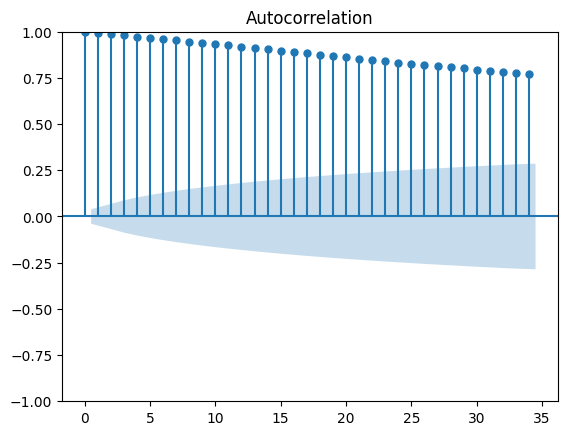

In [7]:
plot_acf(df.bid_close)
plt.show()

We can see that when we difference, the autocorrelation function is much more expected.

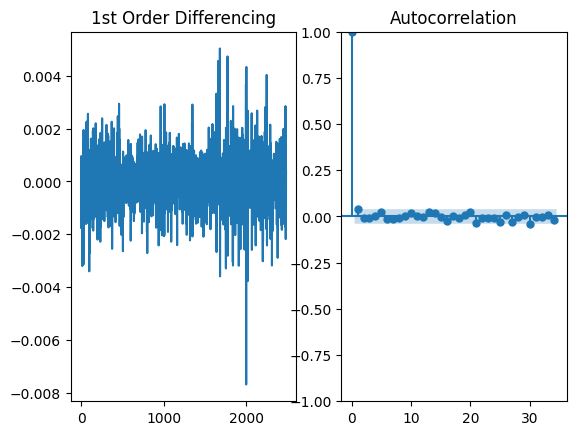

In [8]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df.bid_close.diff())

ax2 = f.add_subplot(122)
plot_acf(df.bid_close.diff().dropna(), ax = ax2)
plt.show()

We can also do some adfuller tests to investigate the differencing parameter.

In [10]:
result = adfuller(df.bid_close.dropna())
print('p-value: ', result[1])

result = adfuller(df.bid_close.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.bid_close.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.04316904869278075
p-value:  0.0
p-value:  1.7620369676602482e-28


We can also look at our partial autocorrelation function that yields the q parameter.

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


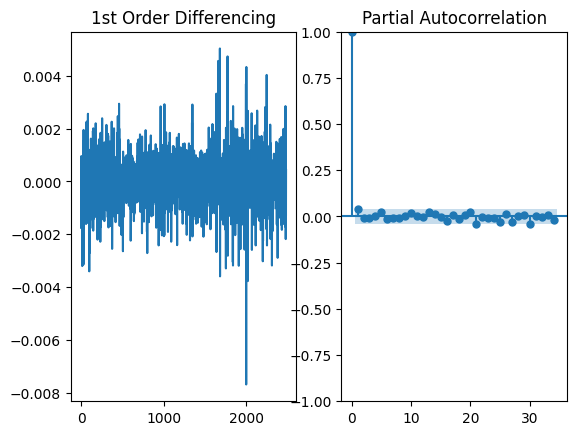

In [12]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df.bid_close.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.bid_close.diff().dropna(), ax = ax2)
plt.show()

We also look at second order differencing.

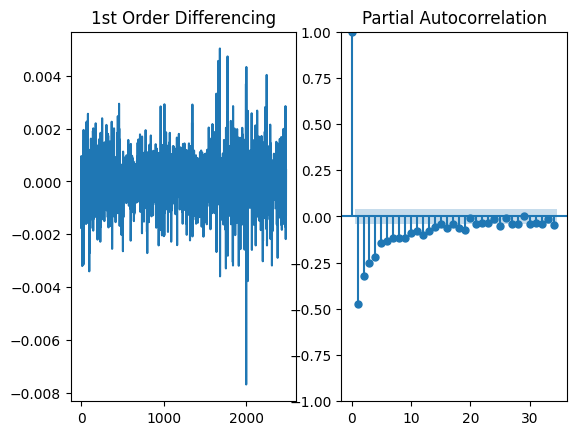

In [13]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(df.bid_close.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.bid_close.diff().diff().dropna(), ax = ax2)
plt.show()

Finally, we can look at our ARIMA model that was derived with our parameters calculated graphically.

In [16]:
arima_model = ARIMA(df.bid_close, order = (1,1,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              bid_close   No. Observations:                 2486
Model:                 ARIMA(1, 1, 1)   Log Likelihood               14030.005
Date:                Thu, 03 Nov 2022   AIC                         -28054.010
Time:                        12:31:54   BIC                         -28036.556
Sample:                             0   HQIC                        -28047.671
                               - 2486                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1131      0.007    -15.789      0.000      -0.127      -0.099
ma.L1          0.1551      0.007     21.428      0.000       0.141       0.169
sigma2      7.291e-07   1.05e-08     69.676      0.0

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Now, we can demonstrate how to plot for in-sample error, using our ARIMA model previously found.

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ybeki\AppData\Local\Pr

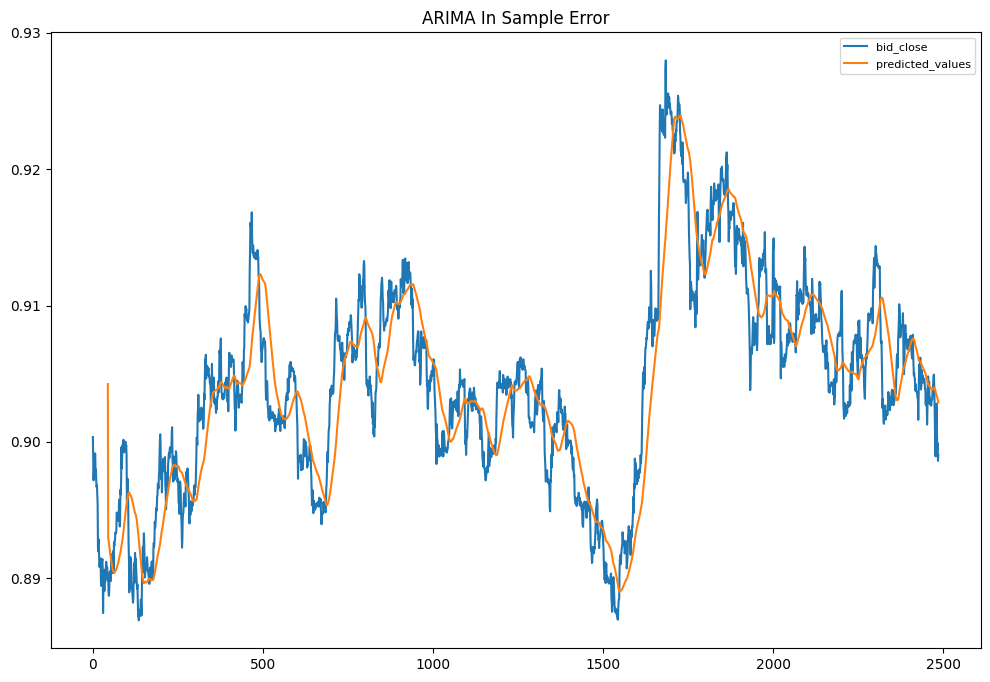

In [23]:
def plotARMA(df_accumulative,ax,label):
    result=df_accumulative
    result=result.rolling(window=45).mean().dropna()
    mod = sm.tsa.arima.ARIMA(result, order=(1,0,1))
    res = mod.fit()
    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end=400)
    df_accumulative.plot(ax=ax,label=label)
    res.predict().plot(ax=ax,label=label)

fig,ax = plt.subplots(figsize=(12,8))    
plotARMA(df,ax,"predicted_values")
plt.legend(fontsize=8)
plt.title("ARIMA In Sample Error")
plt.show()

We will also do a train test split, to look at our out-of-sample predictions.

In [24]:
# Create Training and Test
train = df.bid_close[:85]
test = df.bid_close[85:]

msk = (df.index < len(df)-300)
df_train = df[msk].copy()
df_test = df[~msk].copy()

In [27]:
auto_arima = pm.auto_arima(df_train , stepwise = False, seasonal = False)
auto_arima

c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\ybeki\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [28]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2186
Model:               SARIMAX(0, 1, 1)   Log Likelihood               12343.926
Date:                Thu, 03 Nov 2022   AIC                         -24681.853
Time:                        12:39:55   BIC                         -24664.785
Sample:                             0   HQIC                        -24675.614
                               - 2186                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.847e-06   1.89e-05      0.151      0.880   -3.42e-05    3.99e-05
ma.L1          0.0369      0.015      2.419      0.016       0.007       0.067
sigma2      7.237e-07   1.08e-08     67.203      0.000    7.03e-07    7.45e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3566.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: >

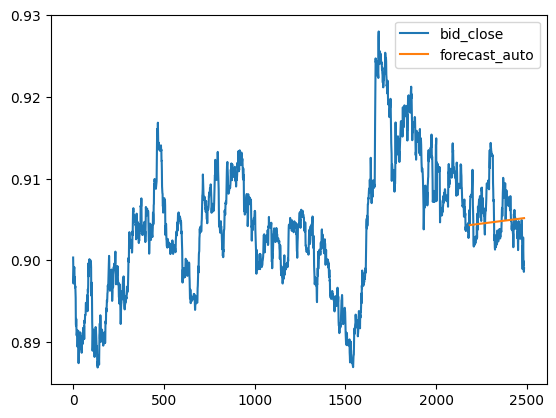

In [29]:
forecast_test_auto = auto_arima.predict(n_periods = len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

### Supervised learning models
We deployed a Logistic regression and Randomforest Classifier model.
* Logistic: models the probability for classification with two possible outcomes
* Random Forest: uses decision trees on the data to classify for producing predictions

Process:
* Fitting model function
* Get Probaility
* Get Prediction values
* Coefficient importance

In [154]:
def predictModel(data, ML):
    df_bid = data[['datetime', 'bid_open', 'bid_close', 'bid_volume']]
    df_bid = df_bid.set_index(['datetime'])
    #other features
    df_bid['avg_10'] = df_bid['bid_close'].rolling(window=10).mean()
    df_bid['avg_15'] = df_bid['bid_close'].rolling(window=15).mean()
    df_bid['Force_Index'] = df_bid['bid_close'] * df_bid['bid_volume']
    df_bid['RSI_15'] = ta.RSI(np.array(df_bid['bid_close']), timeperiod=15)
    df_bid['Open-Close'] = df_bid['bid_open'] - df_bid['bid_close'].shift(15)
    df_bid['Close_Diff'] = df_bid['bid_close'] - df_bid['bid_close'].shift(15)
    df_bid = df_bid.dropna()
    X= df_bid
    y = np.where(df_bid['bid_close'].shift(-5) > df_bid['bid_close'], 1,-1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=64)
    if ML == 'lg':
        model = LogisticRegression().fit(X_train, y_train)
    elif ML == 'rf':
            model = RandomForestClassifier(n_estimators=1000)
            model.fit(X_train, y_train)
    else:
        print("Error: please type 'logistic or randomforest for the model parameter")
    return model, X_train, X_test, y_train, y_test

In [155]:
# setting up both logistic and random forest models for FX pairings
eurgbp_lmodel, eurgbpX_ltrain, eurgbpX_ltest, eurgbpy_ltrain, eurgbpy_ltest = predictModel(dfeurgbp_hr, 'lg')
eurgbp_rmodel, eurgbpX_rtrain, eurgbpX_rtest, eurgbpy_rtrain, eurgbpy_rtest = predictModel(dfeurgbp_hr, 'rf')

In [156]:
# predicted probabilties
eurgbpl_prob = eurgbp_lmodel.predict_proba(eurgbpX_ltest)
eurgbpr_prob = eurgbp_rmodel.predict_proba(eurgbpX_rtest)
print(f'Probability values for logistic eurgbp: \n{eurgbpl_prob[:5]}')
print(f'Probability values for Random Forest eurgbp: \n{eurgbpr_prob[:5]}')

Probability values for logistic eurgbp: 
[[0.50342392 0.49657608]
 [0.5036602  0.4963398 ]
 [0.50469519 0.49530481]
 [0.49563176 0.50436824]
 [0.49608304 0.50391696]]
Probability values for Random Forest eurgbp: 
[[0.646 0.354]
 [0.618 0.382]
 [0.591 0.409]
 [0.118 0.882]
 [0.263 0.737]]


In [157]:
#prediction values
eurgbpl_predictvals = eurgbp_lmodel.predict(eurgbpX_ltest)
eurgbpr_predictvals = eurgbp_rmodel.predict(eurgbpX_rtest)

In [158]:
def feature_importance(df_columns, feature_values):
    data = {'Feature_names':np.array(df_columns),'Feature_importance':np.array(feature_values)}
    fi = pd.DataFrame(data)
    plt.barh(fi['Feature_names'], fi['Feature_importance'])
    plt.show()

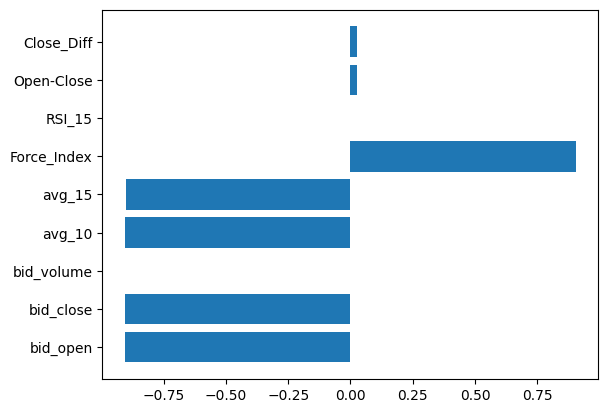

In [159]:
feature_importance(eurgbpX_ltrain.columns, eurgbp_lmodel.coef_[0])

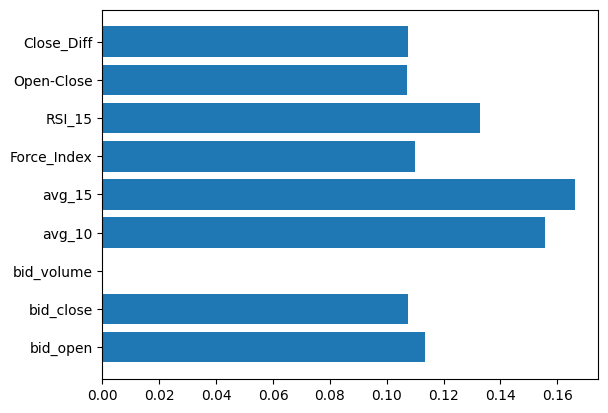

In [160]:
feature_importance(eurgbpX_rtrain.columns, eurgbp_rmodel.feature_importances_)

### Model evaluation
This section will focus on evaluating the logistic and random forest model from above.
Evaluation methods consist of:
* Confusion matrix
* R-squared
* Accuracy score
* Precision score
* Proportion of the prediction values

#### Confusion Matrix

In [161]:
print(metrics.confusion_matrix(eurgbpy_ltest, eurgbpl_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurgbpy_ltest, eurgbpl_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[ 57 190]
 [ 17 223]]
tn:57, fp:190, fn:17, tp:223


In [162]:
print(metrics.confusion_matrix(eurgbpy_rtest, eurgbpr_predictvals))
tn, fp, fn, tp = metrics.confusion_matrix(eurgbpy_rtest, eurgbpr_predictvals).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

[[117 130]
 [ 91 149]]
tn:117, fp:130, fn:91, tp:149


#### Evaluation scores

In [165]:
def eval_scores(model, predict, X_train, y_train, X_test, y_test):
    print(f'(R^2) Score: {metrics.r2_score(y_test, predict) :.2f}')
    print(f'Test Score : {model.score(X_test, y_test) * 100:.2f}% ')
    print(f'Precision : {precision_score(y_test, predict)*100 :.2f}%')
    print(f'Accuracy: {accuracy_score(y_test, predict)*100 :.2f}%')

In [166]:
print('Logistic evaulation metrics')
eval_scores(eurgbp_lmodel,  eurgbpl_predictvals, eurgbpX_ltrain, eurgbpy_ltrain, eurgbpX_ltest, eurgbpy_ltest)
print('Random Forest evaulation metrics')
print('EURGBP:')
eval_scores(eurgbp_rmodel, eurgbpr_predictvals, eurgbpX_rtrain, eurgbpy_rtrain, eurgbpX_rtest, eurgbpy_rtest)

Logistic evaulation metrics
(R^2) Score: -0.70
Test Score : 57.49% 
Precision : 54.00%
Accuracy: 57.49%
Random Forest evaulation metrics
EURGBP:
(R^2) Score: -0.82
Test Score : 54.62% 
Precision : 53.41%
Accuracy: 54.62%


#### Proportion of the prediction values

In [168]:
def total_predictions(y_test, predict):
    combined = pd.concat({"Target": pd.Series(y_test),"Predictions": pd.Series(predict)}, axis=1)
    return combined

In [169]:
print('Logistic proportion')
print(total_predictions(eurgbpy_ltest,eurgbpl_predictvals)["Predictions"].value_counts())
print('Random Forest proportion:')
print(total_predictions(eurgbpy_rtest,eurgbpr_predictvals)["Predictions"].value_counts())

Logistic proportion
 1    413
-1     74
Name: Predictions, dtype: int64
Random Forest proportion:
 1    279
-1    208
Name: Predictions, dtype: int64


## 4. Overall findings:

### ARIMA model:
* As it uses previous data to predict the future, and price of assets cannot usually be determined just by looking at the past, this is evident in our out-of-sample predictions being quite inaccurate.
* In-sample predictions are quite good.
* All of the currency pairings struggled in predicting outside of the sample.

### Logistic and Random Forest:
* Models are within the 53-58% accuracy and precision region
* Overall it seems that logistic model produces the highest accuracy results and precision
* Seems the results of Random Forest Classifier are more realistic due to the proportion or 1s and 0s. 
* Overall both models produce similar dominate trading signals.
    * EURBGP have more positives (1)
    * EURAUD have more negatives (-1)
    * EURAUD has more positives (1) 
    * GBPUSD has more positives (1)
* Based on our r-squared value it seems even if our results may dominate in positives however it seems like the predicted results are following a strongly negative trend

## 5. Outstanding/future work
* Deploying more efficient predictive model such as a LSTM Recurrent Neural Network
* Conducting our analysis on all FX pairings rather than three (EUR/GBP, EUR/AUD and GBP/USD)
* Use more data to produce more efficient predictions eg 1-2 years worth

## Thank you

Any Questions?